# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from datetime import datetime, timedelta

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Connect to Azure Machine Learning Service workspace

In [2]:
import azureml.core
from azureml.core import Workspace

ws = Workspace.from_config(path="../src_aml")

## Download latest dataset 

In [3]:
from azureml.core import Experiment

experiment = Experiment(ws, "Data_Preparation_Pipeline")

latest_completed_run = None
for run in experiment.get_runs():
    if run.get_status() == "Finished":
        latest_completed_run = run
        break

In [4]:
data_filename = "cleaning_output_pipeline_data"
download_location_base = os.path.join("..", "data", "interim", "after_cleaning")

In [5]:
# Retrieve the last step
last_step = latest_completed_run.find_step_run(name="Data cleaning")
if last_step:
    last_step_obj = last_step[0] # since we have only one step with the name
    # download output from the last step
    last_step_obj.get_output_data(data_filename).download(download_location_base, overwrite=True)

## Load data

In [6]:
# set path to downloaded data
filepath = os.path.join(download_location_base, "azureml", last_step[0].id, data_filename)
filepath

'..\\data\\interim\\after_cleaning\\azureml\\e78be5a4-bb0f-41d4-acb3-9c709e0cf43b\\cleaning_output_pipeline_data'

In [7]:
# load data
df = pd.read_csv(filepath, parse_dates=['Timestamp'])
df = df.set_index('Timestamp')

## Quick verification of datasets

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14134 entries, 2019-10-25 15:20:00 to 2020-02-03 06:00:00
Columns: 204 entries, 15001 to 15254
dtypes: float64(204)
memory usage: 22.1 MB


In [9]:
df.shape

(14134, 204)

In [10]:
# statistical characteristics of the dataset
df.describe()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
count,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,...,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000
mean,3.980190,3.248974,7.586246,7.752016,1.795599,2.390477,3.709566,2.964200,4.240838,5.216570,...,2.689967,1.998302,3.218480,3.281520,1.745154,1.726121,2.722230,3.250035,2.962290,1.365997
std,4.455242,4.056462,9.862762,11.429769,1.695334,2.867359,3.556588,3.351059,3.677918,4.596752,...,3.582364,2.045958,3.828926,2.873926,1.970921,1.813743,2.935924,2.455352,3.041761,2.187453
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000
75%,6.000000,5.000000,11.000000,9.000000,2.000000,3.000000,6.000000,4.000000,6.000000,7.000000,...,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,4.000000,2.000000
max,34.000000,32.000000,38.000000,70.000000,11.000000,15.000000,29.000000,20.000000,20.000000,23.000000,...,29.000000,15.000000,24.000000,16.000000,10.000000,11.000000,13.000000,16.000000,17.000000,9.000000


In [11]:
df.head()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,0.0
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,0.0
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,0.0
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,0.0
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,0.0


In [12]:
df.tail()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-03 05:20:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 05:30:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 05:40:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 05:50:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 06:00:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0


In [13]:
# make sure dataframe has no missing data
assert df.isnull().sum().sum() == 0, "The dataframe contains some null values"

## Feature engineering

In [14]:
df['Summer Season'] = df.index.to_series().apply(lambda x: x.month not in [12,1,2])

## Visual inspection

In [15]:
def detect_periods_with_missing_data(df, time_window_hours=1):
    # algorithm 1
#     # Set time period/window and calculate number of all available bikes
#     rule = f"{time_window_hours}H"
#     resampled_df = df.resample(rule).sum().sum(axis=1)
#     # Calculate slope/steepness of the graph of a function
#     # (sum of all available bikes for each time window)
#     slope = pd.Series(np.gradient(resampled_df.values), 
#                       resampled_df.index, 
#                       name='slope')
#     # Determine time windows on which the number of available 
#     # bikes did not change (so the slope is 0).
#     return slope[ slope == 0 ].index
    
    # algorithm 2
    # Set time period/window and calculate number of all available bikes
    rule = f"{time_window_hours}H"
    diff = df.resample(rule).sum().sum(axis=1) - df.resample(rule).sum().sum(axis=1).shift(1)
    diff = df.resample(rule).sum().sum(axis=1) - df.resample(rule).sum().sum(axis=1).shift(1)
    return diff[diff.values == 0].index

In [18]:
time_window_hours = 4
missing_data_periods = detect_periods_with_missing_data(df, time_window_hours)
# missing_data_periods

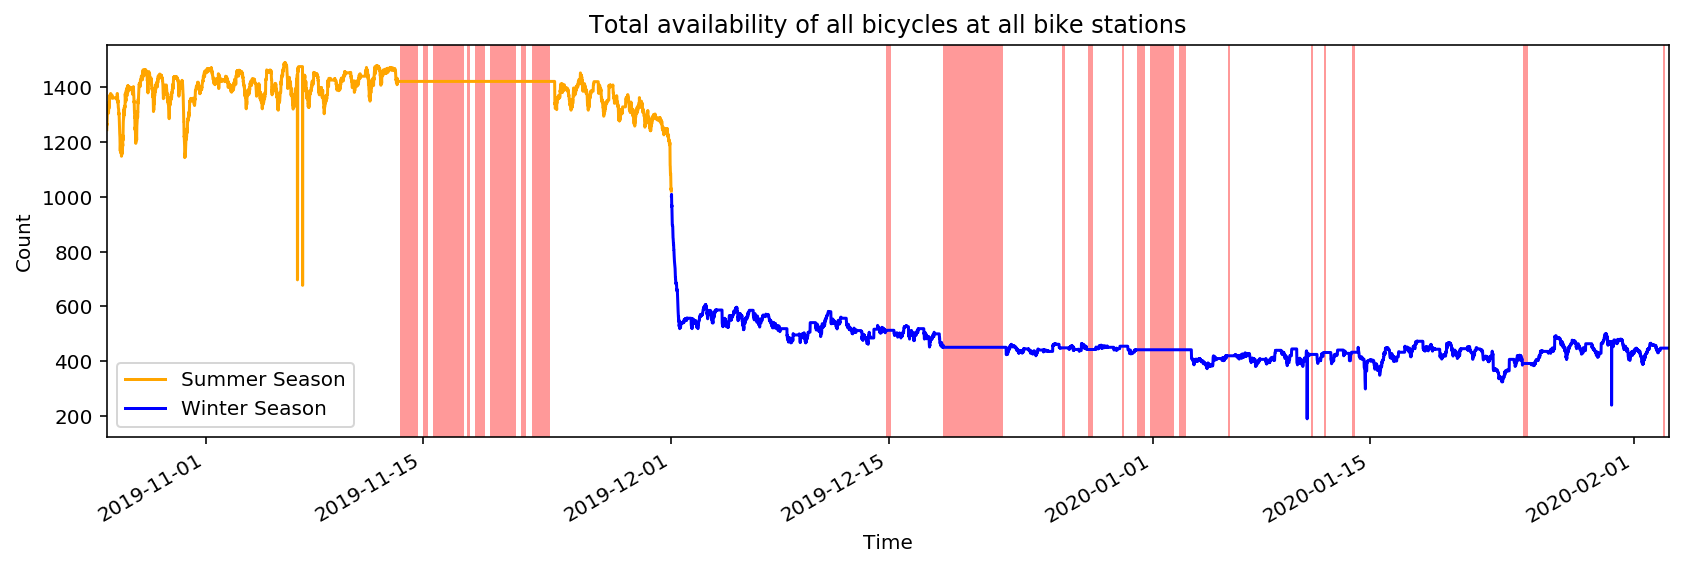

In [19]:
plt.figure(figsize=(14,4))
ax = df[ df['Summer Season'] == True ].sum(axis=1).plot(color='orange')
ax = df[ df['Summer Season'] == False ].sum(axis=1).plot(color='b')

# plot 
for i in range(0, len(missing_data_periods)):
    plt.axvspan(missing_data_periods[i]-timedelta(hours=time_window_hours), 
                missing_data_periods[i], 
                facecolor='r', alpha=0.4)

ax.set_title('Total availability of all bicycles at all bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend(['Summer Season', 'Winter Season']);

In [ ]:
# for index, value in df[(df.index >= '2019-11-13') & (df.index <= '2019-11-24')].sum(axis=1).items():
#     print(index, value)

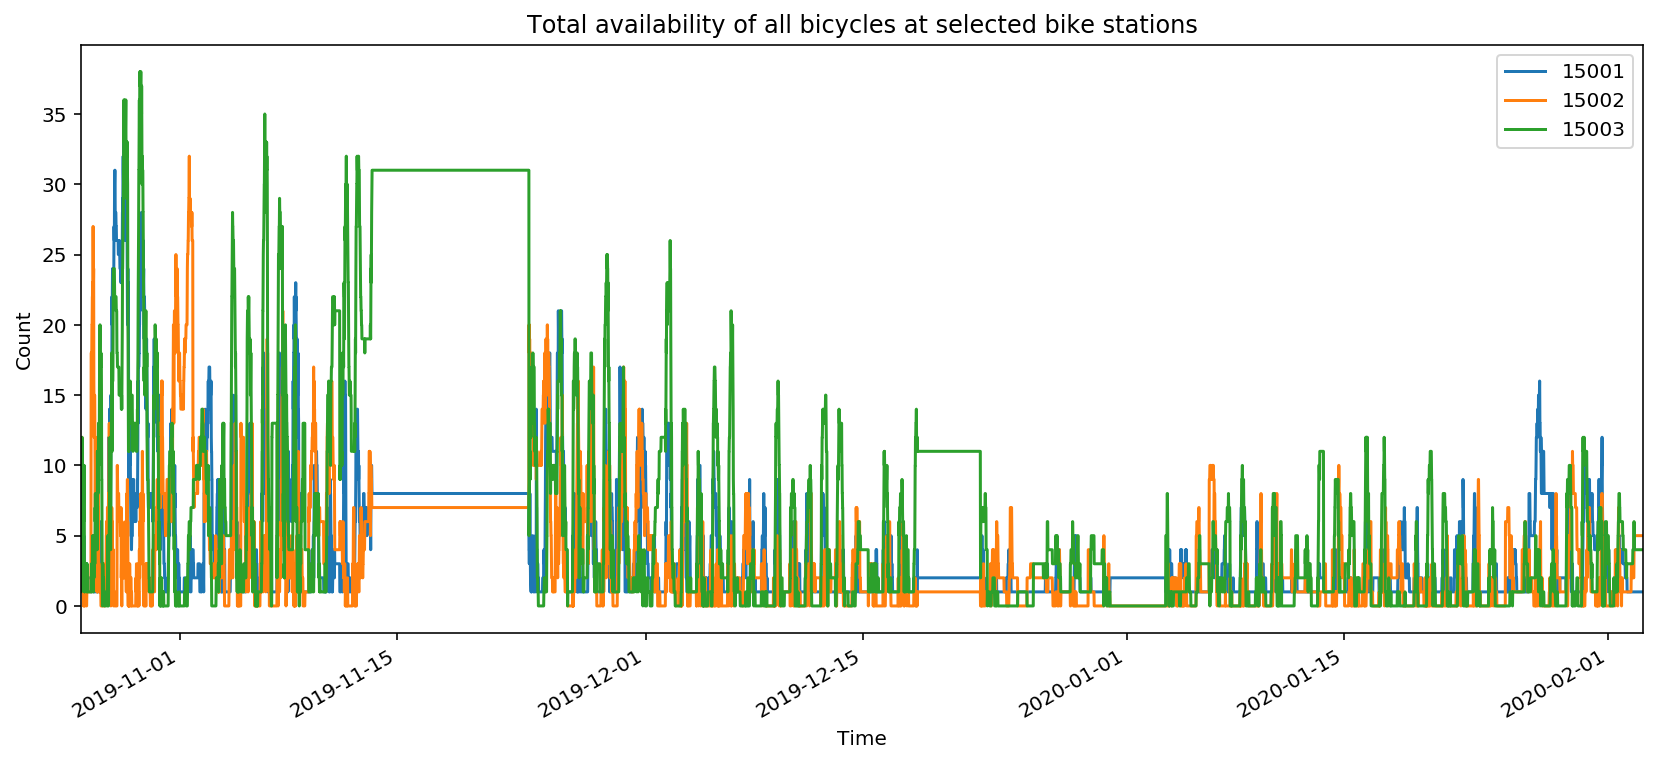

In [20]:
ax = df[['15001', '15002', '15003']].plot(figsize=(14,6))
ax.set_title('Total availability of all bicycles at selected bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');

In [ ]:
# data = [1,2,3,3,4,5,5,5,5,5,5,5,5,5,6]
# tempdf = pd.DataFrame(data, index=pd.date_range(start='2020-01-01 00:00:00', periods=len(data), freq='H'))
# tempdf

In [ ]:
# tempdf.resample('2H').sum()

In [ ]:
# diff = tempdf.resample('2H').sum() - tempdf.resample('2H').sum().shift(1)
# diff[diff.values==0]